In [1]:
# imports
import numpy as np
import pandas as pd
import gc
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import Bunch
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
!pip install nilearn
import nilearn
from nilearn import plotting, image, signal
from nilearn.datasets import fetch_abide_pcp, fetch_atlas_basc_multiscale_2015, fetch_atlas_aal
from nilearn.connectome import ConnectivityMeasure
from nilearn.image import load_img
from nilearn.connectome import ConnectivityMeasure
from nilearn.maskers import NiftiMapsMasker
import nibabel as nib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 31.3 MB/s eta 0:00:00


In [3]:
class Abide: #So we can use it like the initial data
  def __init__(self, description, phenotypic, func_preproc):
    self.description = description
    self.phenotypic = phenotypic
    self.func_preproc = func_preproc

  def __getitem__(self, key): #bracket
    if key == 'description':
      return self.description
    elif key == 'phenotypic':
      return self.phenotypic
    elif key == 'func_preproc':
      return self.func_preproc


  def __getattr__(self, key): #dot
    if key == 'description':
      return self.description
    elif key == 'phenotypic':
      return self.phenotypic
    elif key == 'func_preproc':
      return self.func_preproc


Dataset created in /root/nilearn_data/ABIDE_pcp



 ...done. (0 seconds, 0 min)


Downloaded 58531840 of 104419884 bytes (56.1%,    0.9s remaining) ...done. (2 seconds, 0 min)


Downloaded 58089472 of 107986683 bytes (53.8%,    0.9s remaining) ...done. (2 seconds, 0 min)


Downloaded 107298816 of 110518334 bytes (97.1%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 56336384 of 115167850 bytes (48.9%,    1.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 92266496 of 102974496 bytes (89.6%,    0.2s remaining) ...done. (3 seconds, 0 min)


Downloaded 61358080 of 105723516 bytes (58.0%,    0.7s remaining) ...done. (2 seconds, 0 min)


Downloaded 61161472 of 108702932 bytes (56.3%,    0.8s remaining) ...done. (2 seconds, 0 min)


Downloaded 50323456 of 100532666 bytes (50.1%,    1.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 68182016 of 110228275 bytes (61.9%,    0.6s remaining) ...done. (2 seconds, 0 min)


Downloaded 109043712 of 112533425 bytes (96.9%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 108814336 of 110058848 bytes (98.9%,    0.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 57360384 of 110376924 bytes (52.0%,    0.9s remaining) ...done. (3 seconds, 0 min)


Downloaded 100687872 of 102489954 bytes (98.2%,    0.4s remaining) ...done. (21 seconds, 0 min)


Downloaded 44023808 of 108195357 bytes (40.7%,    1.5s remaining) ...done. (2 seconds, 0 min)


Downloaded 58712064 of 105232630 bytes (55.8%,    0.8s remaining) ...done. (2 seconds, 0 min)


Downloaded 93388800 of 111013388 bytes (84.1%,    0.4s remaining) ...done. (3 seconds, 0 min)


Downloaded 99770368 of 104067786 bytes (95.9%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 104562688 of 107633250 bytes (97.1%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 58712064 of 106714902 bytes (55.0%,    0.8s remaining) ...done. (2 seconds, 0 min)


Downloaded 103874560 of 112515401 bytes (92.3%,    0.2s remaining) ...done. (3 seconds, 0 min)


Downloaded 111230976 of 111380261 bytes (99.9%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 58851328 of 109775490 bytes (53.6%,    0.9s remaining) ...done. (2 seconds, 0 min)


Downloaded 97411072 of 114295718 bytes (85.2%,    0.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 109043712 of 115673440 bytes (94.3%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 117432320 of 121318546 bytes (96.8%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 98910208 of 113306058 bytes (87.3%,    0.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 100646912 of 120938259 bytes (83.2%,    0.4s remaining) ...done. (3 seconds, 0 min)


Downloaded 95256576 of 122574265 bytes (77.7%,    0.6s remaining) ...done. (3 seconds, 0 min)


Downloaded 108158976 of 122383426 bytes (88.4%,    0.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 100646912 of 119210228 bytes (84.4%,    0.4s remaining) ...done. (3 seconds, 0 min)


Downloaded 92266496 of 116086868 bytes (79.5%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 103989248 of 122156869 bytes (85.1%,    0.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 100646912 of 125357066 bytes (80.3%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 117432320 of 118740494 bytes (98.9%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 110747648 of 117185869 bytes (94.5%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 109043712 of 121608785 bytes (89.7%,    0.2s remaining) ...done. (3 seconds, 0 min)


Downloaded 63021056 of 116464120 bytes (54.1%,    0.9s remaining) ...done. (2 seconds, 0 min)


Downloaded 110796800 of 123786681 bytes (89.5%,    0.2s remaining) ...done. (3 seconds, 0 min)


 ...done. (1 seconds, 0 min)


Downloaded 41934848 of 45661369 bytes (91.8%,    0.1s remaining) ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


Downloaded 58712064 of 103307732 bytes (56.8%,    0.8s remaining) ...done. (2 seconds, 0 min)


Downloaded 60751872 of 104869475 bytes (57.9%,    0.7s remaining) ...done. (2 seconds, 0 min)


Downloaded 50323456 of 95474541 bytes (52.7%,    0.9s remaining) ...done. (2 seconds, 0 min)


Downloaded 63987712 of 107870342 bytes (59.3%,    0.7s remaining) ...done. (2 seconds, 0 min)


Downloaded 56098816 of 103306942 bytes (54.3%,    0.8s remaining) ...done. (2 seconds, 0 min)


Downloaded 54706176 of 102761508 bytes (53.2%,    0.9s remaining) ...done. (3 seconds, 0 min)


Downloaded 63873024 of 101015070 bytes (63.2%,    0.6s remaining) ...done. (2 seconds, 0 min)


Downloaded 64782336 of 97961086 bytes (66.1%,    0.5s remaining) ...done. (2 seconds, 0 min)


Downloaded 51208192 of 88100076 bytes (58.1%,    0.7s remaining) ...done. (2 seconds, 0 min)


Downloaded 50323456 of 82149656 bytes (61.3%,    0.7s remaining) ...done. (2 seconds, 0 min)


Downloaded 58712064 of 81739638 bytes (71.8%,    0.4s remaining) ...done. (2 seconds, 0 min)


Downloaded 53313536 of 79578720 bytes (67.0%,    0.5s remaining) ...done. (2 seconds, 0 min)


Downloaded 47357952 of 79167312 bytes (59.8%,    0.7s remaining) ...done. (2 seconds, 0 min)


Downloaded 50323456 of 85134814 bytes (59.1%,    0.7s remaining) ...done. (2 seconds, 0 min)


Downloaded 50331648 of 84685546 bytes (59.4%,    0.7s remaining) ...done. (2 seconds, 0 min)


Downloaded 58712064 of 86433443 bytes (67.9%,    0.5s remaining) ...done. (2 seconds, 0 min)


Downloaded 62324736 of 89827896 bytes (69.4%,    0.4s remaining) ...done. (2 seconds, 0 min)


Downloaded 51068928 of 82403522 bytes (62.0%,    0.6s remaining) ...done. (2 seconds, 0 min)


Downloaded 61325312 of 89196011 bytes (68.8%,    0.5s remaining) ...done. (2 seconds, 0 min)


Downloaded 66502656 of 86734034 bytes (76.7%,    0.3s remaining) ...done. (2 seconds, 0 min)


Downloaded 65126400 of 85240741 bytes (76.4%,    0.3s remaining) ...done. (2 seconds, 0 min)


Downloaded 58712064 of 89255889 bytes (65.8%,    0.6s remaining) ...done. (2 seconds, 0 min)


Downloaded 57974784 of 89696906 bytes (64.6%,    0.5s remaining) ...done. (2 seconds, 0 min)


Downloaded 46235648 of 88226898 bytes (52.4%,    0.9s remaining) ...done. (2 seconds, 0 min)


Downloaded 48037888 of 85619700 bytes (56.1%,    0.8s remaining) ...done. (2 seconds, 0 min)


Downloaded 56115200 of 85749288 bytes (65.4%,    0.5s remaining) ...done. (2 seconds, 0 min)


Downloaded 50323456 of 80406871 bytes (62.6%,    0.7s remaining) ...done. (2 seconds, 0 min)


Downloaded 175554560 of 204073805 bytes (86.0%,    0.5s remaining) ...done. (4 seconds, 0 min)


Downloaded 156524544 of 173382781 bytes (90.3%,    0.3s remaining) ...done. (4 seconds, 0 min)


Downloaded 142598144 of 170223641 bytes (83.8%,    0.6s remaining) ...done. (4 seconds, 0 min)


Downloaded 157655040 of 178755670 bytes (88.2%,    0.4s remaining) ...done. (4 seconds, 0 min)


Downloaded 161357824 of 176860851 bytes (91.2%,    0.3s remaining) ...done. (4 seconds, 0 min)


Downloaded 159375360 of 180574638 bytes (88.3%,    0.4s remaining) ...done. (4 seconds, 0 min)


Downloaded 150986752 of 168785580 bytes (89.5%,    0.4s remaining) ...done. (4 seconds, 0 min)


Downloaded 187088896 of 190222690 bytes (98.4%,    0.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 134209536 of 178264954 bytes (75.3%,    1.0s remaining) ...done. (4 seconds, 0 min)


Downloaded 150986752 of 167834099 bytes (90.0%,    0.3s remaining) ...done. (4 seconds, 0 min)


Downloaded 176152576 of 186119228 bytes (94.6%,    0.2s remaining) ...done. (4 seconds, 0 min)


Downloaded 119046144 of 178023482 bytes (66.9%,    1.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 169279488 of 169555833 bytes (99.8%,    0.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 150986752 of 175713626 bytes (85.9%,    0.5s remaining) ...done. (4 seconds, 0 min)


Downloaded 175824896 of 178961772 bytes (98.2%,    0.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 169156608 of 185573106 bytes (91.2%,    0.3s remaining) ...done. (4 seconds, 0 min)


Downloaded 172212224 of 172936675 bytes (99.6%,    0.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 117030912 of 175332801 bytes (66.7%,    1.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 177971200 of 180845447 bytes (98.4%,    0.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 186261504 of 191049237 bytes (97.5%,    0.1s remaining) ...done. (4 seconds, 0 min)


Downloaded 159375360 of 175033265 bytes (91.1%,    0.3s remaining) ...done. (4 seconds, 0 min)


Downloaded 156704768 of 183210908 bytes (85.5%,    0.5s remaining) ...done. (4 seconds, 0 min)


Downloaded 176152576 of 183517814 bytes (96.0%,    0.1s remaining) ...done. (4 seconds, 0 min)


Downloaded 61194240 of 109481301 bytes (55.9%,    0.8s remaining) ...done. (2 seconds, 0 min)


Downloaded 92405760 of 118156589 bytes (78.2%,    0.6s remaining) ...done. (3 seconds, 0 min)


Downloaded 53108736 of 101609576 bytes (52.3%,    1.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 109043712 of 114979022 bytes (94.8%,    0.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 104275968 of 108536527 bytes (96.1%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 63332352 of 100315008 bytes (63.1%,    0.6s remaining) ...done. (2 seconds, 0 min)


Downloaded 58712064 of 112518259 bytes (52.2%,    0.9s remaining) ...done. (2 seconds, 0 min)


Downloaded 58499072 of 105071443 bytes (55.7%,    0.8s remaining) ...done. (2 seconds, 0 min)


Downloaded 63905792 of 108382438 bytes (59.0%,    0.7s remaining) ...done. (2 seconds, 0 min)


Downloaded 58712064 of 105424334 bytes (55.7%,    0.8s remaining) ...done. (2 seconds, 0 min)


Downloaded 100646912 of 107697423 bytes (93.5%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 100466688 of 102831611 bytes (97.7%,    0.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 58712064 of 105868787 bytes (55.5%,    0.8s remaining) ...done. (2 seconds, 0 min)


Downloaded 102875136 of 110373167 bytes (93.2%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 58712064 of 106676912 bytes (55.0%,    0.9s remaining) ...done. (2 seconds, 0 min)


Downloaded 55975936 of 95467541 bytes (58.6%,    0.7s remaining) ...done. (2 seconds, 0 min)


Downloaded 54894592 of 107811709 bytes (50.9%,    1.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 102850560 of 103013827 bytes (99.8%,    0.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 109043712 of 109340774 bytes (99.7%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 100646912 of 110403873 bytes (91.2%,    0.2s remaining) ...done. (3 seconds, 0 min)


Downloaded 64012288 of 102741119 bytes (62.3%,    0.6s remaining) ...done. (2 seconds, 0 min)


Downloaded 64200704 of 113831652 bytes (56.4%,    0.8s remaining) ...done. (2 seconds, 0 min)


Downloaded 63184896 of 102054140 bytes (61.9%,    0.6s remaining) ...done. (2 seconds, 0 min)


Downloaded 63389696 of 119693152 bytes (53.0%,    0.9s remaining) ...done. (2 seconds, 0 min)


Downloaded 107560960 of 109552949 bytes (98.2%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 91078656 of 105507823 bytes (86.3%,    0.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 106405888 of 122660208 bytes (86.7%,    0.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 117432320 of 122066162 bytes (96.2%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 109428736 of 125524859 bytes (87.2%,    0.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 96411648 of 119530321 bytes (80.7%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 117432320 of 128732335 bytes (91.2%,    0.2s remaining) ...done. (2 seconds, 0 min)


Downloaded 99188736 of 114050974 bytes (87.0%,    0.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 117432320 of 118377207 bytes (99.2%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 109043712 of 129287582 bytes (84.3%,    0.4s remaining) ...done. (3 seconds, 0 min)


Downloaded 109043712 of 120564753 bytes (90.4%,    0.2s remaining) ...done. (3 seconds, 0 min)


Downloaded 100646912 of 123902251 bytes (81.2%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 117129216 of 122851217 bytes (95.3%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 101326848 of 119903539 bytes (84.5%,    0.4s remaining) ...done. (3 seconds, 0 min)


Downloaded 123183104 of 124953879 bytes (98.6%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 114794496 of 118668066 bytes (96.7%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 24387584 of 48202845 bytes (50.6%,    2.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 42426368 of 48390941 bytes (87.7%,    1.3s remaining) ...done. (10 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


Downloaded 42147840 of 47925361 bytes (87.9%,    0.1s remaining) ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


Downloaded 39002112 of 102625489 bytes (38.0%,    1.6s remaining) ...done. (2 seconds, 0 min)


Downloaded 49463296 of 105533255 bytes (46.9%,    1.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 92266496 of 107072040 bytes (86.2%,    0.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 54272000 of 106884892 bytes (50.8%,    1.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 58712064 of 100240888 bytes (58.6%,    0.7s remaining) ...done. (2 seconds, 0 min)


Downloaded 49446912 of 100130834 bytes (49.4%,    1.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 60981248 of 102821793 bytes (59.3%,    0.7s remaining) ...done. (2 seconds, 0 min)


Downloaded 99753984 of 106424505 bytes (93.7%,    0.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 67100672 of 104764204 bytes (64.0%,    0.6s remaining) ...done. (2 seconds, 0 min)


Downloaded 58712064 of 101762563 bytes (57.7%,    0.8s remaining) ...done. (2 seconds, 0 min)


Downloaded 101679104 of 103476731 bytes (98.3%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 54542336 of 99319344 bytes (54.9%,    0.8s remaining) ...done. (2 seconds, 0 min)


Downloaded 54910976 of 106144149 bytes (51.7%,    0.9s remaining) ...done. (2 seconds, 0 min)


Downloaded 50642944 of 98283071 bytes (51.5%,    0.9s remaining) ...done. (2 seconds, 0 min)


Downloaded 58712064 of 96666269 bytes (60.7%,    0.7s remaining) ...done. (2 seconds, 0 min)


Downloaded 58712064 of 109179568 bytes (53.8%,    1.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 58712064 of 104315489 bytes (56.3%,    0.8s remaining) ...done. (2 seconds, 0 min)


Downloaded 65757184 of 100755881 bytes (65.3%,    0.5s remaining) ...done. (2 seconds, 0 min)


Downloaded 61276160 of 104049488 bytes (58.9%,    0.7s remaining) ...done. (2 seconds, 0 min)


Downloaded 52092928 of 86334444 bytes (60.3%,    0.7s remaining) ...done. (2 seconds, 0 min)


Downloaded 62005248 of 82453566 bytes (75.2%,    0.9s remaining) ...done. (3 seconds, 0 min)


Downloaded 58712064 of 81189491 bytes (72.3%,    0.4s remaining) ...done. (2 seconds, 0 min)


Downloaded 63930368 of 80788761 bytes (79.1%,    0.3s remaining) ...done. (2 seconds, 0 min)


Downloaded 50323456 of 88438528 bytes (56.9%,    0.8s remaining) ...done. (2 seconds, 0 min)


Downloaded 58712064 of 82657156 bytes (71.0%,    0.4s remaining) ...done. (2 seconds, 0 min)


Downloaded 47030272 of 82083586 bytes (57.3%,    0.8s remaining) ...done. (2 seconds, 0 min)


Downloaded 58712064 of 88311033 bytes (66.5%,    0.5s remaining) ...done. (2 seconds, 0 min)


Downloaded 50323456 of 84832785 bytes (59.3%,    0.7s remaining) ...done. (2 seconds, 0 min)


Downloaded 83935232 of 83958604 bytes (100.0%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 53157888 of 85078204 bytes (62.5%,    0.6s remaining) ...done. (2 seconds, 0 min)


Downloaded 58712064 of 85316744 bytes (68.8%,    0.5s remaining) ...done. (2 seconds, 0 min)


Downloaded 50323456 of 83650716 bytes (60.2%,    0.7s remaining) ...done. (2 seconds, 0 min)


Downloaded 55197696 of 84223335 bytes (65.5%,    0.5s remaining) ...done. (2 seconds, 0 min)


Downloaded 168771584 of 183734194 bytes (91.9%,    1.3s remaining) ...done. (15 seconds, 0 min)


Downloaded 142598144 of 168430232 bytes (84.7%,    0.6s remaining) ...done. (4 seconds, 0 min)


Downloaded 167673856 of 176080760 bytes (95.2%,    0.2s remaining) ...done. (4 seconds, 0 min)


Downloaded 167763968 of 171687355 bytes (97.7%,    0.1s remaining) ...done. (4 seconds, 0 min)


Downloaded 167763968 of 197028587 bytes (85.1%,    0.9s remaining) ...done. (6 seconds, 0 min)


Downloaded 159113216 of 191276384 bytes (83.2%,    0.8s remaining) ...done. (5 seconds, 0 min)


Downloaded 171286528 of 182230155 bytes (94.0%,    0.2s remaining) ...done. (4 seconds, 0 min)


Downloaded 115056640 of 166196097 bytes (69.2%,    0.9s remaining) ...done. (3 seconds, 0 min)


Downloaded 163110912 of 175007222 bytes (93.2%,    0.2s remaining) ...done. (4 seconds, 0 min)


Downloaded 142598144 of 184875700 bytes (77.1%,    0.9s remaining) ...done. (4 seconds, 0 min)


Downloaded 150986752 of 168213614 bytes (89.8%,    0.4s remaining) ...done. (4 seconds, 0 min)


Downloaded 118235136 of 168203795 bytes (70.3%,    0.9s remaining) ...done. (3 seconds, 0 min)


Downloaded 117432320 of 170906006 bytes (68.7%,    0.9s remaining) ...done. (3 seconds, 0 min)


Downloaded 109043712 of 169005844 bytes (64.5%,    1.1s remaining) ...done. (3 seconds, 0 min)


35

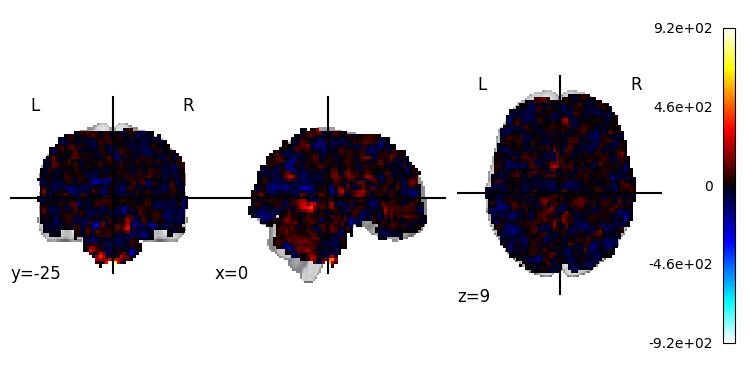

In [4]:
# Fetch dataset

# Because of its large size (400 gb+), we will take some samples (200 samples)
autist = fetch_abide_pcp(n_subjects = 100, derivatives = ['func_preproc'], pipeline = 'cpac', DX_GROUP=1)
control = fetch_abide_pcp(n_subjects = 100, derivatives = ['func_preproc'], pipeline = 'cpac', DX_GROUP=2)
combined_phenotypic = np.concatenate((autist['phenotypic'], control['phenotypic']))
combined_func_preproc = np.concatenate((autist['func_preproc'], control['func_preproc']), axis=0)
abide = Abide(autist.description, combined_phenotypic, combined_func_preproc)
first_abide = image.index_img(abide.func_preproc[0], 0) #example image
plotting.plot_stat_map(first_abide)

# free memory
del autist
del control
gc.collect()

In [5]:
print(image.load_img(abide.func_preproc[0]).shape)

imgRes=np.array(abide.func_preproc)
imgCat = np.array(abide.phenotypic['DX_GROUP'])

print(imgRes.shape)
print(imgCat.shape)

del abide
gc.collect()

(61, 73, 61, 196)
(200,)
(200,)


11663

In [2]:
# Fetch mask
multiscale = fetch_atlas_basc_multiscale_2015()
atlas_filename = multiscale.scale064
masker = NiftiMapsMasker(
    maps_img=atlas_filename,
    standardize=True,
    memory='nilearn_cache',
    reduce_method = 'median',
    verbose=0)
correlation_measure = ConnectivityMeasure(kind='correlation')


Added README.md to /root/nilearn_data


Dataset created in /root/nilearn_data/basc_multiscale_2015



 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/basc_multiscale_2015/53337d5c408465aa257d35f81c13413b/1861819..... done.


In [6]:
# Extract and reshape features
ts = []
cor = []
for i, files in enumerate(imgRes):
  timeseries = masker.fit_transform(files)
  print("Initial shape :", timeseries.shape)
  if timeseries.shape[0]<150:
    ps = (150-timeseries.shape[0])//2
    pe = (150-timeseries.shape[0])-ps
    timeseries = np.pad(timeseries, ((ps, pe),(0, 0)), mode='mean')
  elif timeseries.shape[0]>150:
    ps = (timeseries.shape[0]-150)//2
    pe = ps+150
    timeseries = timeseries[ps:pe, :]
  print("First change (features) :", timeseries.shape)
  ts.append(timeseries)
  timeseries = np.append(timeseries, imgCat[i])
  print("Second change (for correlation matrix) :", timeseries.shape)
  cor.append(timeseries)
  print('Finished %s of %s\n'%(i+1,len(imgRes)))
ts = np.array(ts)
ts = ts.squeeze()
cor = np.array(cor)
cor = cor.squeeze()

/usr/local/lib/python3.10/dist-packages/nilearn/maskers/base_masker.py:253: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  return self.transform_single_imgs(


Initial shape : (196, 1)
First change (features) : (150, 1)
Second change (for correlation matrix) : (151,)
Finished 1 of 200

Initial shape : (196, 1)
First change (features) : (150, 1)
Second change (for correlation matrix) : (151,)
Finished 2 of 200

Initial shape : (196, 1)
First change (features) : (150, 1)
Second change (for correlation matrix) : (151,)
Finished 3 of 200

Initial shape : (196, 1)
First change (features) : (150, 1)
Second change (for correlation matrix) : (151,)
Finished 4 of 200

Initial shape : (196, 1)
First change (features) : (150, 1)
Second change (for correlation matrix) : (151,)
Finished 5 of 200

Initial shape : (196, 1)
First change (features) : (150, 1)
Second change (for correlation matrix) : (151,)
Finished 6 of 200

Initial shape : (196, 1)
First change (features) : (150, 1)
Second change (for correlation matrix) : (151,)
Finished 7 of 200

Initial shape : (196, 1)
First change (features) : (150, 1)
Second change (for correlation matrix) : (151,)
Fin

(151, 151)

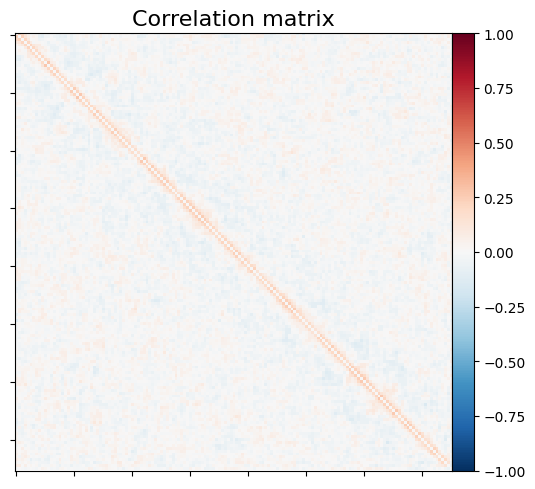

In [7]:
# Correlation matrix
correlation_matrix = correlation_measure.fit_transform([cor])[0]
np.fill_diagonal(correlation_matrix, 0)

plotting.plot_matrix(
    correlation_matrix,
    vmin=-1.0,
    vmax=1.0,
    colorbar=True,
    title="Correlation matrix"
)
correlation_matrix.shape

In [8]:
# Feature selection
delIdx = []
newTs = ts
for i in range(150):
  if correlation_matrix[150][i]>(-0.05) and correlation_matrix[150][i]<0.05:
    delIdx.append(i)
newTs = np.delete(ts, delIdx, axis=1)
newTs.shape

(200, 17)

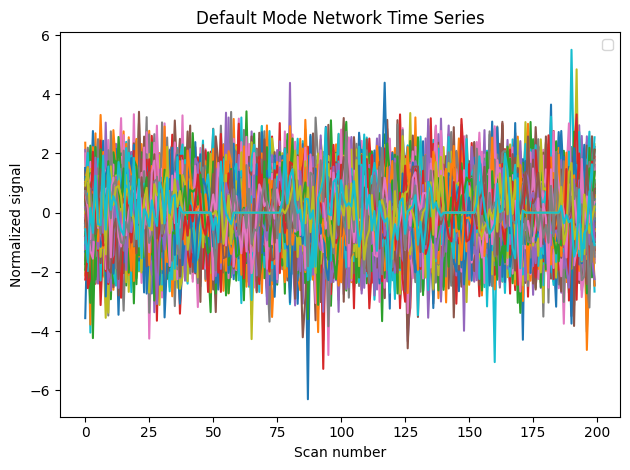

In [9]:
# Extracted signal

for time_serie in ts.T:
    plt.plot(time_serie)

plt.title("Default Mode Network Time Series")
plt.xlabel("Scan number")
plt.ylabel("Normalized signal")
plt.legend()
plt.tight_layout()

In [10]:
# Prepare dataset
ss = StandardScaler()
pca = PCA(n_components=3)

X = ss.fit_transform(newTs)
X = pca.fit_transform(X)
y = imgCat

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

In [11]:
# Hyperparameter tuning
rf = RandomForestClassifier()
params = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'criterion': ['gini', 'entropy', 'log_loss'], 'max_features': ['sqrt', 'log2', None], 'max_depth': [None, 5, 10, 15, 20], 'max_leaf_nodes': [None, 5, 10, 20, 25, 40, 50]}
gcv = GridSearchCV(rf, param_grid=params, scoring='accuracy', verbose=3, cv=4).fit(X_train, y_train)

y_val_gcv = gcv.predict(X_validation)
print("Grid Search CV Scores :")
print(classification_report(y_validation, y_val_gcv))
print("Best parameter : ", gcv.best_params_)
print("Best estimator :", gcv.best_estimator_)

Streaming output truncated to the last 5000 lines.
[CV 2/4] END criterion=entropy, max_depth=20, max_features=sqrt, max_leaf_nodes=5, n_estimators=40;, score=0.600 total time=   0.1s
[CV 3/4] END criterion=entropy, max_depth=20, max_features=sqrt, max_leaf_nodes=5, n_estimators=40;, score=0.675 total time=   0.1s
[CV 4/4] END criterion=entropy, max_depth=20, max_features=sqrt, max_leaf_nodes=5, n_estimators=40;, score=0.550 total time=   0.1s
[CV 1/4] END criterion=entropy, max_depth=20, max_features=sqrt, max_leaf_nodes=5, n_estimators=50;, score=0.575 total time=   0.1s
[CV 2/4] END criterion=entropy, max_depth=20, max_features=sqrt, max_leaf_nodes=5, n_estimators=50;, score=0.600 total time=   0.1s
[CV 3/4] END criterion=entropy, max_depth=20, max_features=sqrt, max_leaf_nodes=5, n_estimators=50;, score=0.675 total time=   0.1s
[CV 4/4] END criterion=entropy, max_depth=20, max_features=sqrt, max_leaf_nodes=5, n_estimators=50;, score=0.575 total time=   0.1s
[CV 1/4] END criterion=en

Test Scores:
              precision    recall  f1-score   support

           1       0.82      0.69      0.75        13
           2       0.56      0.71      0.63         7

    accuracy                           0.70        20
   macro avg       0.69      0.70      0.69        20
weighted avg       0.73      0.70      0.71        20



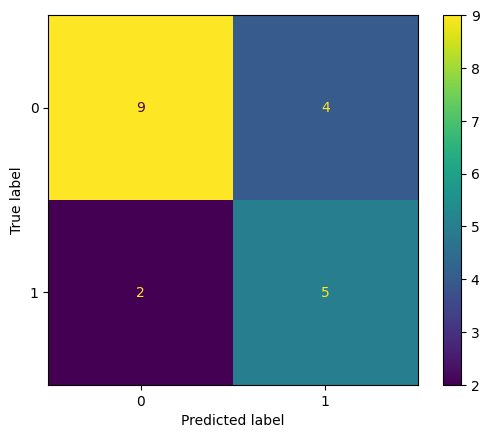

In [12]:
# Testing
rf = gcv.best_estimator_.fit(X_train, y_train)
y_pred_test = rf.predict(X_test)
print("Test Scores:")
print(classification_report(y_test, y_pred_test))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test)).plot()